In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('Datasets/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

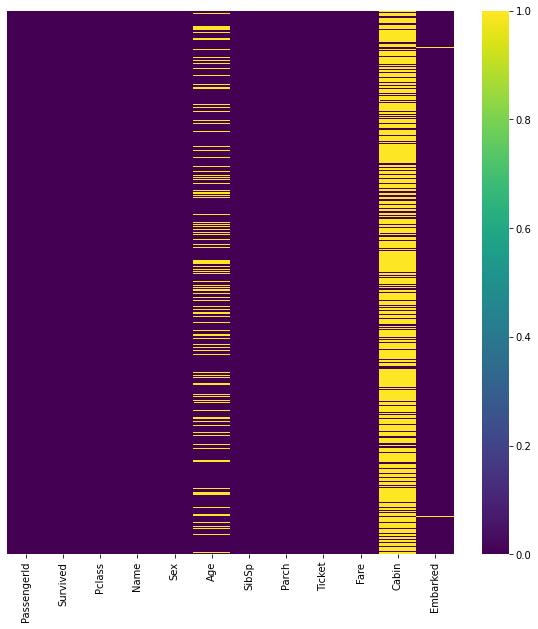

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

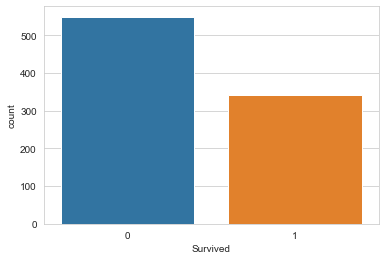

In [5]:
sns.set_style('whitegrid')
sns.countplot(df.Survived)

<AxesSubplot:xlabel='Survived', ylabel='count'>

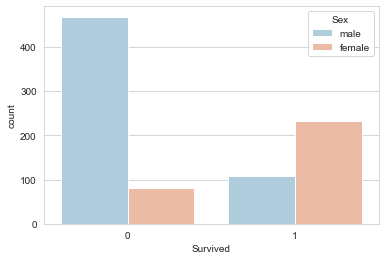

In [6]:
sns.countplot(df.Survived,hue=df.Sex,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

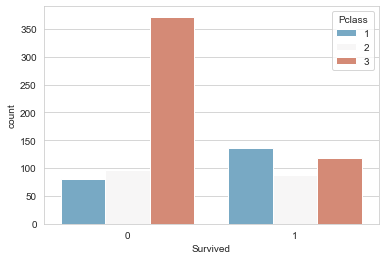

In [7]:

sns.countplot(df.Survived,hue=df.Pclass,palette='RdBu_r')

<AxesSubplot:xlabel='Age'>

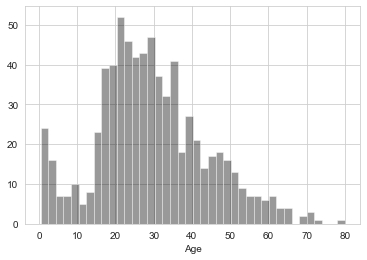

In [8]:

sns.distplot(df.Age,kde=False,bins=40,color='black')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

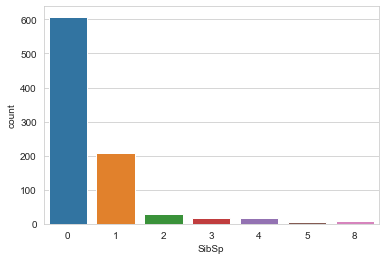

In [9]:
sns.countplot(df.SibSp)

<AxesSubplot:xlabel='Survived', ylabel='count'>

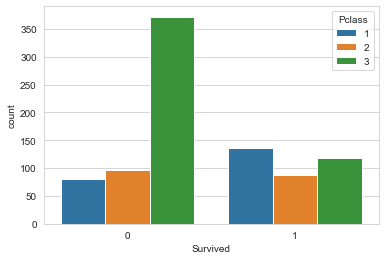

In [10]:
sns.countplot(df.Survived,hue=df.Pclass)

<AxesSubplot:xlabel='Age'>

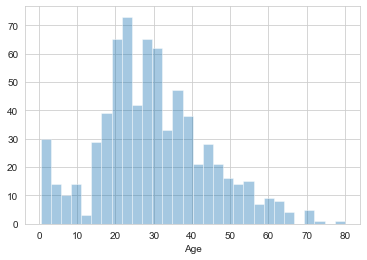

In [11]:
sns.distplot(df.Age,bins=30,kde=False)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

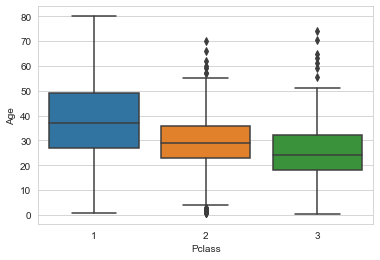

In [12]:
sns.boxplot(df.Pclass,df.Age)

 From above boxplots we can see that Avg age for the passenger classes are 37,29,24 (approx) for classes 1,2,3 resp.

In [13]:
def clean_age(col):
    Age=col[0]
    Class=col[1]
    if pd.isnull(Age):
        if Class==1:
            return 37
        elif Class==2:
            return 29
        elif Class==3:
            return 24
    else:
        return Age

In [14]:
df["Age"]=df[['Age','Pclass']].apply(clean_age,axis=1)

<AxesSubplot:>

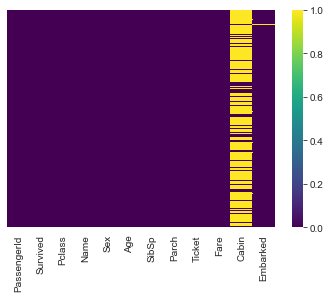

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

As Cabin has max Null values we drop the entire Column

In [16]:
df.drop('Cabin',axis='columns',inplace=True)

<AxesSubplot:>

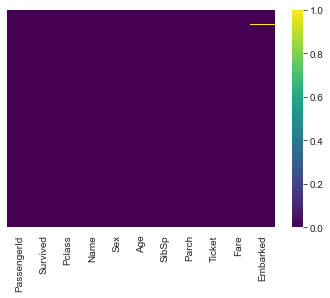

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [18]:
df.Embarked.isnull()[1]

False

In [19]:
df.iloc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Embarked                             S
Name: 0, dtype: object

In [20]:
df.Embarked.isnull().any()

True

<AxesSubplot:>

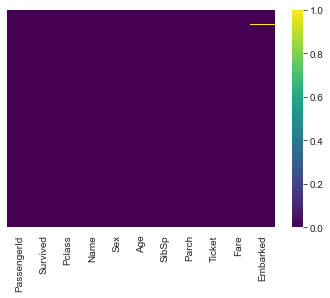

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [22]:
df.dropna(inplace=True)

<AxesSubplot:>

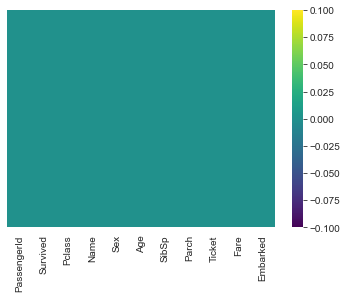

In [23]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [24]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [25]:
sex=pd.get_dummies(df.Sex)

In [26]:
embarked=pd.get_dummies(df.Embarked)

In [29]:
df.drop(['Sex','Ticket','Embarked','Name'],inplace=True,axis=1)

In [30]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,24.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [31]:
df=pd.concat([df,sex,embarked],axis=1)

In [32]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,889,0,3,24.0,1,2,23.4500,1,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [33]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
PassengerId,1.000000,-0.005028,-0.035330,0.033008,-0.057686,-0.001657,0.012703,-0.043136,0.043136,-0.001208,-0.033694,0.022269
Survived,-0.005028,1.000000,-0.335549,-0.052051,-0.034040,0.083151,0.255290,0.541585,-0.541585,0.169966,0.004536,-0.151777
Pclass,-0.035330,-0.335549,1.000000,-0.405549,0.081656,0.016824,-0.548193,-0.127741,0.127741,-0.245733,0.220558,0.076466
Age,0.033008,-0.052051,-0.405549,1.000000,-0.242807,-0.170089,0.120938,-0.083730,0.083730,0.042585,-0.080875,0.013598
SibSp,-0.057686,-0.034040,0.081656,-0.242807,1.000000,0.414542,0.160887,0.116348,-0.116348,-0.060074,-0.026692,0.069438
Parch,-0.001657,0.083151,0.016824,-0.170089,0.414542,1.000000,0.217532,0.247508,-0.247508,-0.011588,-0.081585,0.061512
Fare,0.012703,0.255290,-0.548193,0.120938,0.160887,0.217532,1.000000,0.179958,-0.179958,0.270731,-0.116684,-0.163758
female,-0.043136,0.541585,-0.127741,-0.083730,0.116348,0.247508,0.179958,1.000000,-1.000000,0.084520,0.075217,-0.121405
male,0.043136,-0.541585,0.127741,0.083730,-0.116348,-0.247508,-0.179958,-1.000000,1.000000,-0.084520,-0.075217,0.121405
C,-0.001208,0.169966,-0.245733,0.042585,-0.060074,-0.011588,0.270731,0.084520,-0.084520,1.000000,-0.148646,-0.782613


In [35]:
train=df.drop('Survived',axis=1)

In [36]:
test=df.Survived

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=0.2)

In [38]:
from sklearn.linear_model import LogisticRegression

In [40]:
model=LogisticRegression()

In [41]:
model.fit(x_train,y_train)

C:\Users\RISHABH JAIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
model.score(x_test,y_test)

0.797752808988764

In [50]:
model2=LogisticRegression().fit(x_train.drop(['PassengerId','Q'],axis=1),y_train)

C:\Users\RISHABH JAIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
model2.score(x_test.drop(['PassengerId','Q'],axis=1),y_test)

0.8314606741573034